In [1]:
'''
Uso de árboles de decisión como Regresor.
Para fijar ideas, usarlo como regresor significar que lo usaremos para predecir
pero no usando usando un conjunto de datos con muchas características, sino que
tomaremos una o varias característica como variable/s INDEPENDIENTE y otra 
(la que queremos predecir) como variable DEPENDIENTE.

Vamos a hacer un modelo para un problema con pocos datos.
dOCUMENTACIÓN OFICIAL SKLEARN DECISION TREE
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
'''

# cargamos las librerías que usaremos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from google.colab import files

warnings.filterwarnings('ignore')


In [2]:
files.upload()

Saving datos_V_I.txt to datos_V_I.txt


{'datos_V_I.txt': b'Vcelda1\tIcelda1\tVcelda2\tIcelda2\tVcelda3\tIcelda3\tVcelda4\tIcelda4\tVcelda5\tIcelda5\tVcelda6\tIcelda6\tVcelda7\tIcelda7\tVcelda8\tIcelda8\r\n0\t5.46\t0\t5.501\t0\t5.5\t0\t5.44\t0\t5.39\t0\t5.45\t0\t5.51\t0\t5.3\r\n2.3\t5.43\t0.9\t5.49\t0.6\t5.46\t0.5\t5.44\t2.6\t5.39\t0.7\t5.45\t0.6\t5.48\t2.9\t5.28\r\n6.8\t5.42\t2.7\t5.49\t2.1\t5.45\t2.9\t5.43\t7.2\t5.38\t2\t5.44\t2.6\t5.47\t6.5\t5.27\r\n11\t5.32\t7.2\t5.49\t8.2\t5.42\t6.6\t5.42\t11.4\t5.3\t7.3\t5.43\t9.6\t5.46\t8.4\t5.26\r\n16.5\t4.44\t13.8\t5.37\t15.7\t4.89\t11.7\t5.4\t15.6\t4.73\t15.5\t4.86\t16\t4.67\t14\t5.18\r\n17.7\t3.45\t17.4\t4.07\t18.1\t3.15\t15.1\t5\t17.5\t3.5\t17.1\t3.85\t17.3\t3.66\t15.9\t4.84\r\n18.3\t2.8\t18.3\t3.13\t18.6\t2.46\t17.3\t3.56\t18.2\t2.72\t18.1\t2.8\t18\t2.86\t16.7\t4.5\r\n18.7\t2.31\t18.8\t2.59\t18.9\t2.1\t18.1\t2.68\t18.6\t2.26\t18.6\t2.09\t18.4\t2.35\t17.8\t3.64\r\n18.9\t1.96\t19.1\t2.05\t19.1\t1.83\t18.6\t2.07\t18.9\t1.9\t18.8\t1.81\t18.6\t2.13\t18.5\t2.94\r\n19.1\t1.73\t19.3\t1.

In [3]:
# cargamos los datos en un df, cambiando separador que no es 'coma' sino 'tab'

data = pd.read_csv('datos_V_I.txt', sep = '\t')

In [4]:
print(data.shape)
print(data.head(13))
print(data.columns)

(12, 16)
    Vcelda1  Icelda1  Vcelda2  Icelda2  Vcelda3  Icelda3  Vcelda4  Icelda4  \
0       0.0     5.46      0.0    5.501      0.0     5.50      0.0     5.44   
1       2.3     5.43      0.9    5.490      0.6     5.46      0.5     5.44   
2       6.8     5.42      2.7    5.490      2.1     5.45      2.9     5.43   
3      11.0     5.32      7.2    5.490      8.2     5.42      6.6     5.42   
4      16.5     4.44     13.8    5.370     15.7     4.89     11.7     5.40   
5      17.7     3.45     17.4    4.070     18.1     3.15     15.1     5.00   
6      18.3     2.80     18.3    3.130     18.6     2.46     17.3     3.56   
7      18.7     2.31     18.8    2.590     18.9     2.10     18.1     2.68   
8      18.9     1.96     19.1    2.050     19.1     1.83     18.6     2.07   
9      19.1     1.73     19.3    1.810     19.2     1.63     18.8     1.81   
10     19.2     1.49     19.5    1.510     19.3     1.49     19.0     1.47   
11     20.1     0.00     20.4    0.000     20.2     0.0

In [5]:
# graficaremos las mediciones

def graficar_x_y(x, y, color, celda):
    '''Dados valores x e y, grafica dichos puntos '''
    plt.scatter(x, y, c = color)
    plt.xlabel('Voltaje(V)')
    plt.ylabel('Corriente(A)')
    plt.title(f'Curva característica Corriente vs Voltaje Celda {celda}')
    plt.show()
    plt.close()



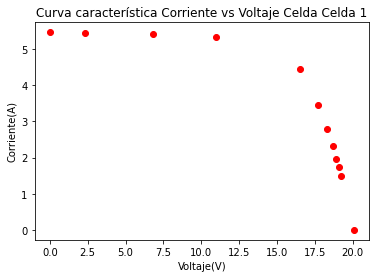

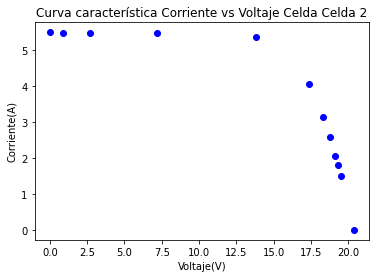

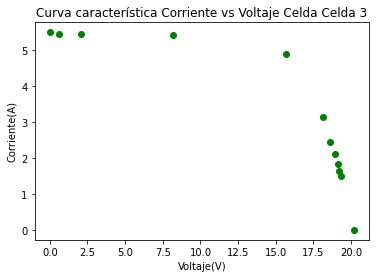

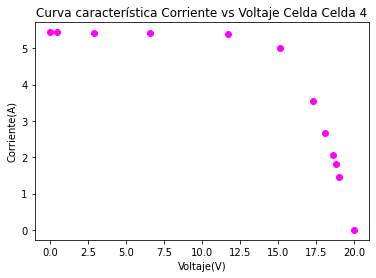

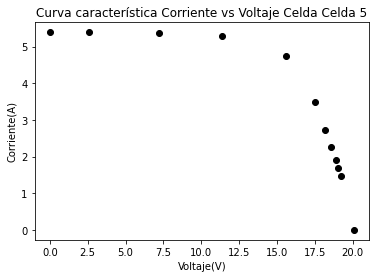

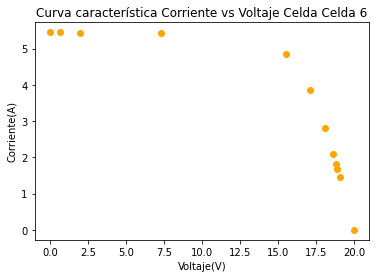

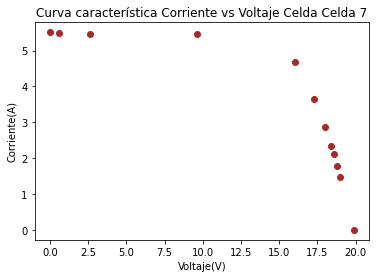

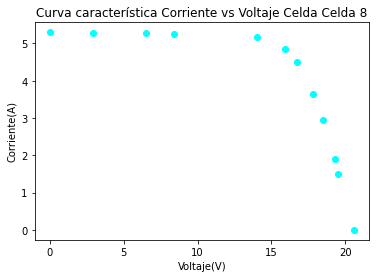

In [6]:
colores=['red', 'blue', 'green', 'magenta', 'black', 'orange', 'brown', 'cyan']

for i, color in enumerate(colores):
    graficar_x_y(data[f'Vcelda{i+1}'], data[f'Icelda{i+1}'], color, f'Celda {i+1}')

In [8]:
# Ahora ponemos a trabajar al arbolito...
# Usamos DecisionTreeRegressor(n_estimators = 100, random_state = 10)
# pedimos que calcule el score (qué tan cerca está la predicción de los datos)
# comparamos la predicción con los datos y graficamos


def regresion_arbol(x, y, color, celda):
    '''Corremos un modelo de árbol de decisión para hacer una regresión de los
    datos y le pedimos el score.
    Luego hacemos correr el predictor sobre un conjunto de datos de entrada en
    el rango de la variable independiente y graficamos el resultado de la
    predicción y los datos originales '''
    # instanciamos modelo
    arbol = DecisionTreeRegressor(random_state = 16)
    # entrenamos...
    # pasamos la columna de pd a un dataframe con = cantidad de filas x 1 col
    x_df = x.to_frame(name = celda)
    arbol.fit(x_df, y)

    # VAMOS A PEDIR UNA PREDICCIÓN Y GRAFICARLA CON OTRO COLOR
    x1=np.array([5.]).reshape(-1, 1)
    y1=arbol.predict(x1)
    x2=np.array([15.]).reshape(-1, 1)
    y2=arbol.predict(x2)

    # definimos el rango de x para graficar
    x_vect = np.arange(0.0, 20.5, 0.01) # es un vector numpy, NO pandas
    x_graf = x_vect.reshape((len(x_vect), 1)) # ahora es un dataframe de 1 col

    # armamos gráfico
    plt.figure(dpi=150)   # abro figura
    plt.scatter(x, y, c = color)     # grafica los datos
    plt.plot(x_graf, arbol.predict(x_graf), color = color) # id predicción
    plt.plot(x1, y1, color='lime', marker='x')
    plt.plot(x2, y2, color='lime', marker='x')
    plt.title(f'Regresión Árbol de Decisión para Celda {celda}')
    plt.xlabel('V (voltaje en voltios)')
    plt.ylabel('I (corriente en amperes)')
    #plt.savefig(f'celda{celda}.png', dpi = 300)  # guardo en archivo
    plt.show()  # muestro gráfico
    plt.close() # cierro figura

    print('\n'*3)
    # preguntamos qué tal predice sobre los datos ingresados
    print('\n')
    print(f'Precisión sobre valores REALES: {arbol.score(x_df, y)}')
    print(f'Precisión sobre valores PREDICCION: {arbol.score(x_graf, arbol.predict(x_graf))}')
    print('\n')

    print('\n'*3)
    plt.figure(dpi=200)
    #plt.title(f'Esquema de árbol de decisión para celda {i+1}')
    plot_tree(arbol)   # gráfico del árbol que hace la regresión
    plt.show()
    plt.close() 
    print('\n'*3)


    return

'''
class sklearn.tree.DecisionTreeRegressor(*, criterion='squared_error', splitter='best', 
max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
 max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
 ccp_alpha=0.0)

sklearn.tree.plot_tree(decision_tree, *, max_depth=None, feature_names=None, 
class_names=None, label='all', filled=False, impurity=True, node_ids=False, 
proportion=False, rounded=False, precision=3, ax=None, fontsize=None)

matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, *, facecolor=None, 
edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, 
clear=False, **kwargs)
'''

"\nclass sklearn.tree.DecisionTreeRegressor(*, criterion='squared_error', splitter='best', \nmax_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,\n max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, \n ccp_alpha=0.0)\n\nsklearn.tree.plot_tree(decision_tree, *, max_depth=None, feature_names=None, \nclass_names=None, label='all', filled=False, impurity=True, node_ids=False, \nproportion=False, rounded=False, precision=3, ax=None, fontsize=None)\n\nmatplotlib.pyplot.figure(num=None, figsize=None, dpi=None, *, facecolor=None, \nedgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, \nclear=False, **kwargs)\n"

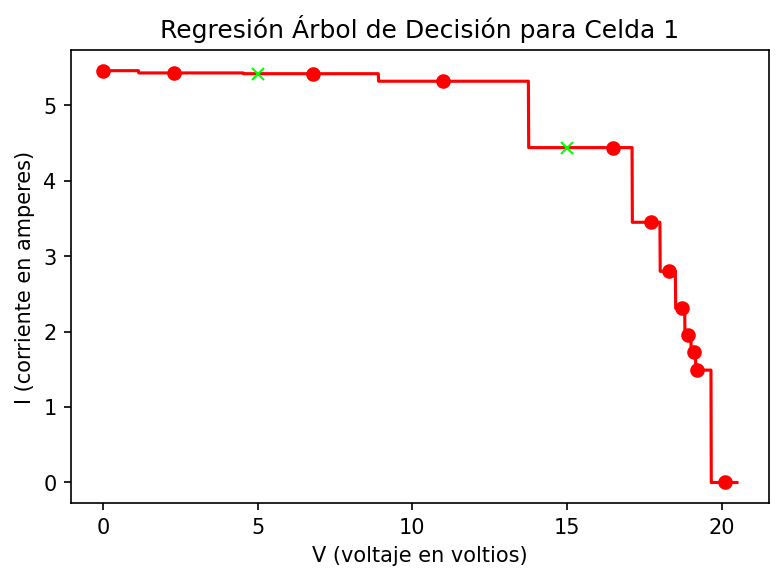







Precisión sobre valores REALES: 1.0
Precisión sobre valores PREDICCION: 1.0








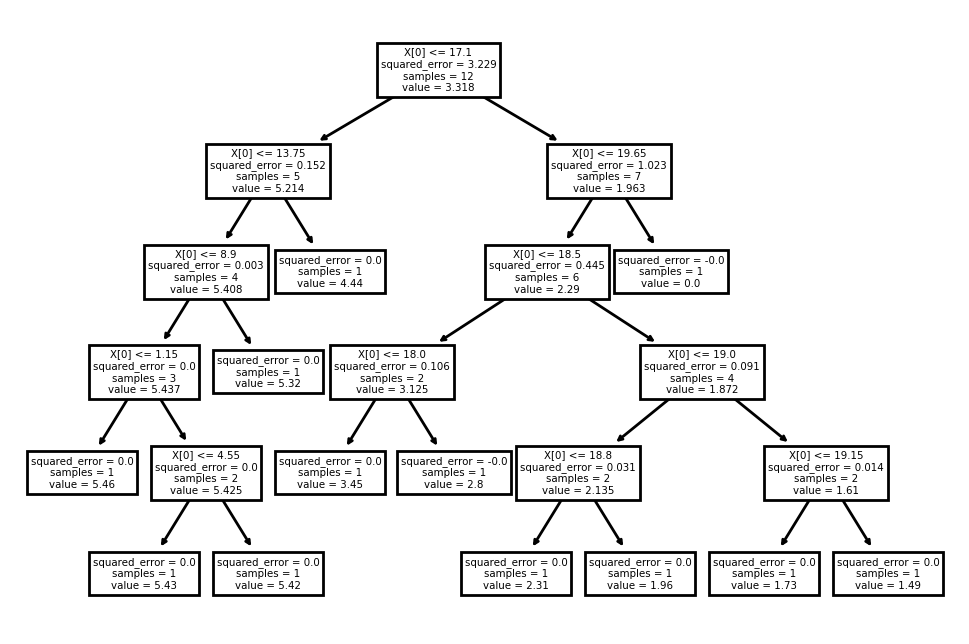

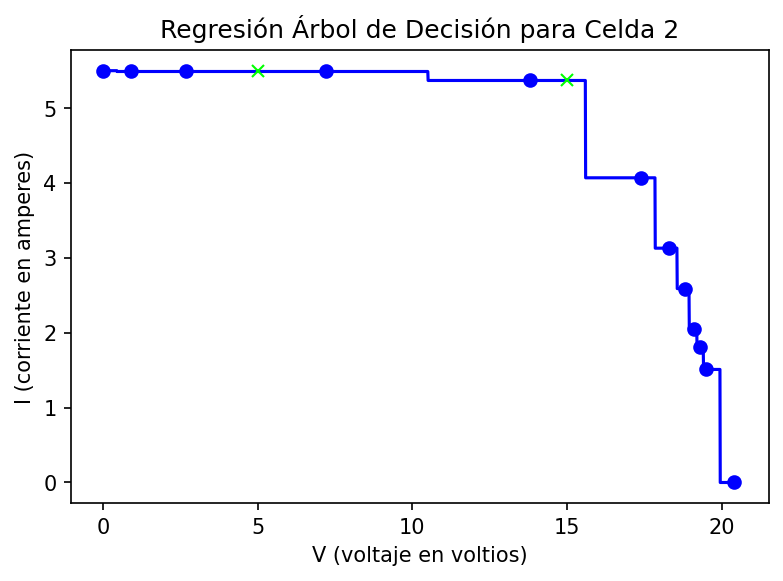







Precisión sobre valores REALES: 1.0
Precisión sobre valores PREDICCION: 1.0








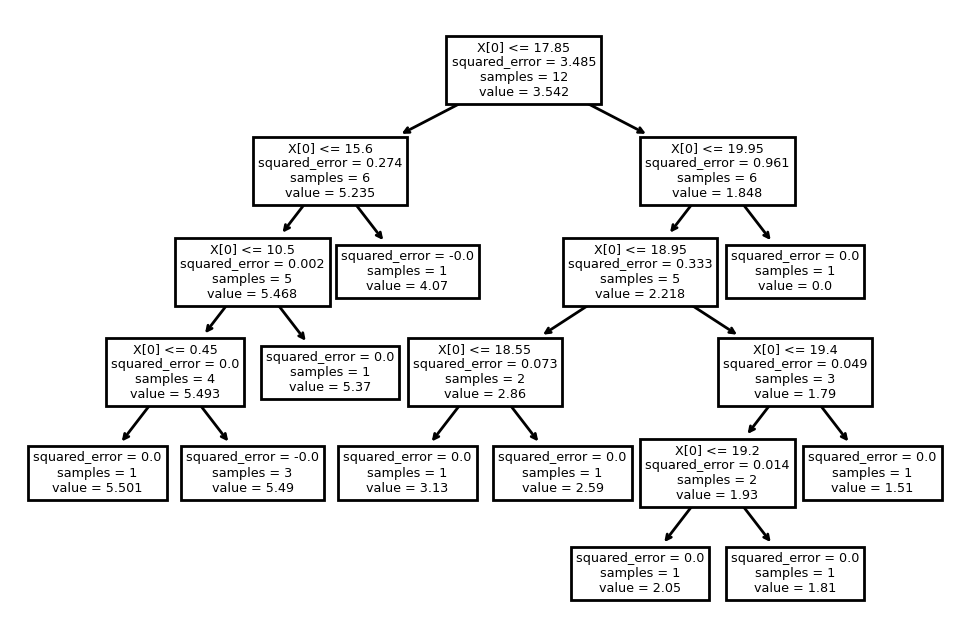

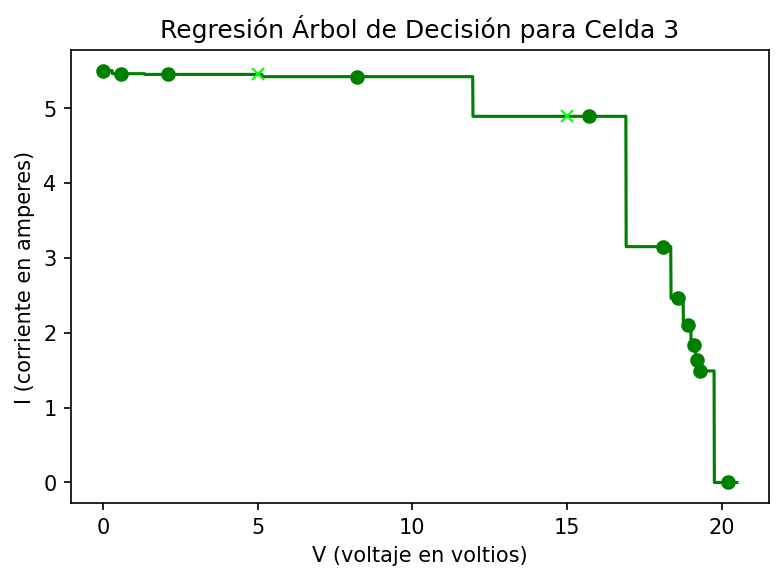







Precisión sobre valores REALES: 1.0
Precisión sobre valores PREDICCION: 1.0








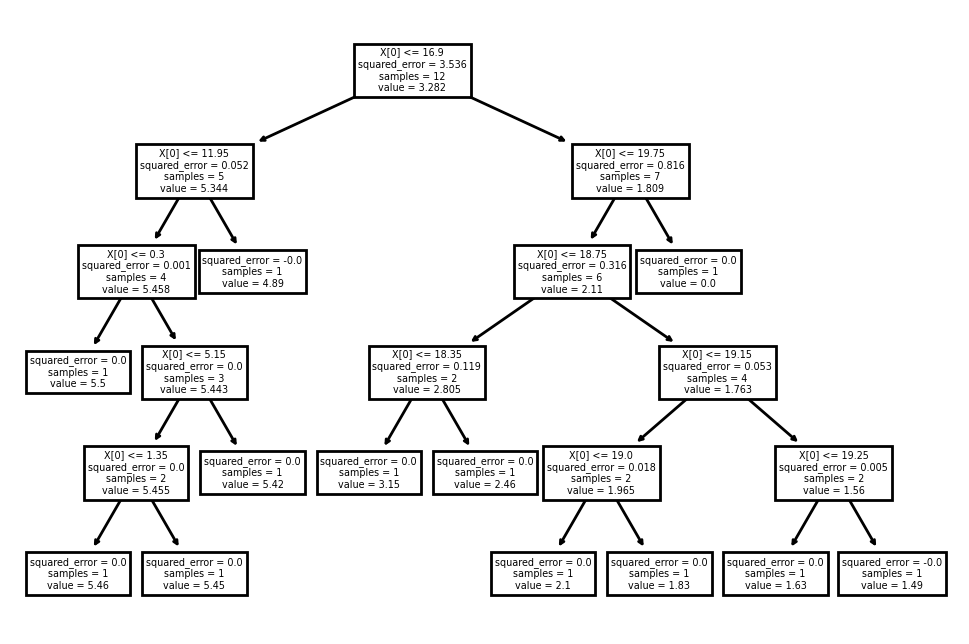

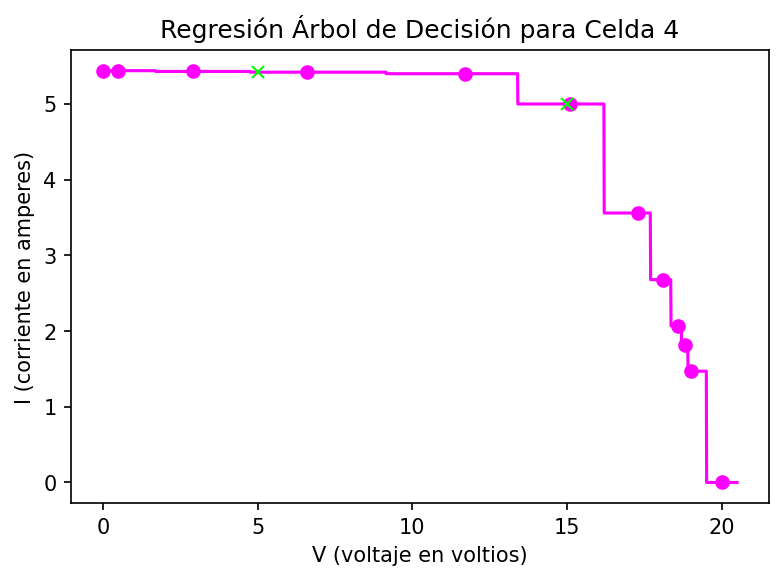







Precisión sobre valores REALES: 1.0
Precisión sobre valores PREDICCION: 1.0








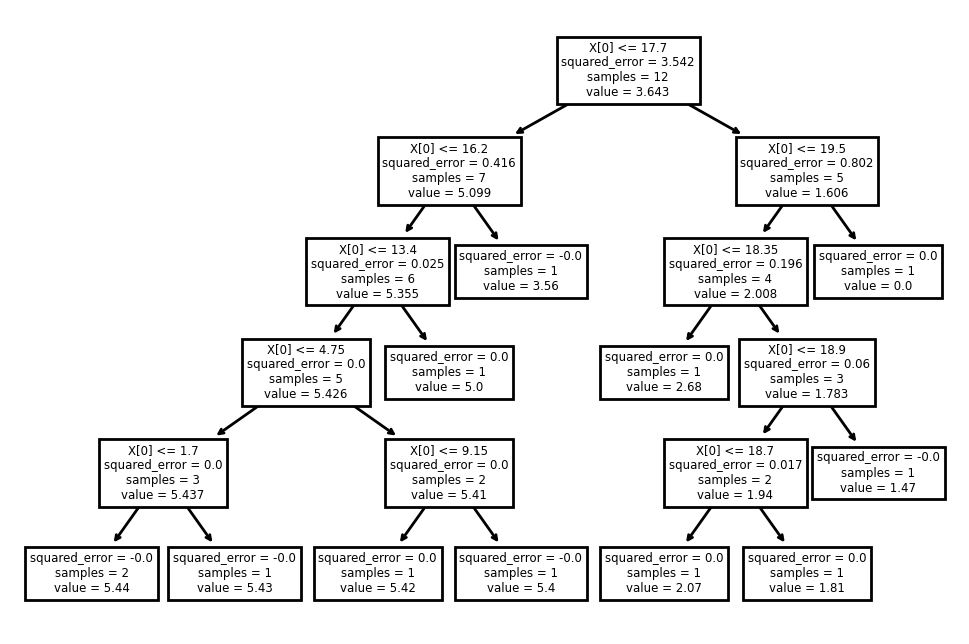

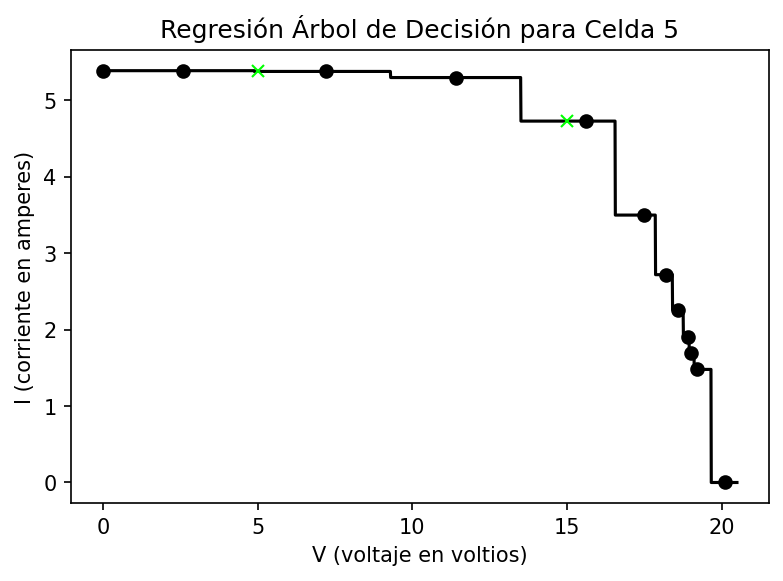







Precisión sobre valores REALES: 1.0
Precisión sobre valores PREDICCION: 1.0








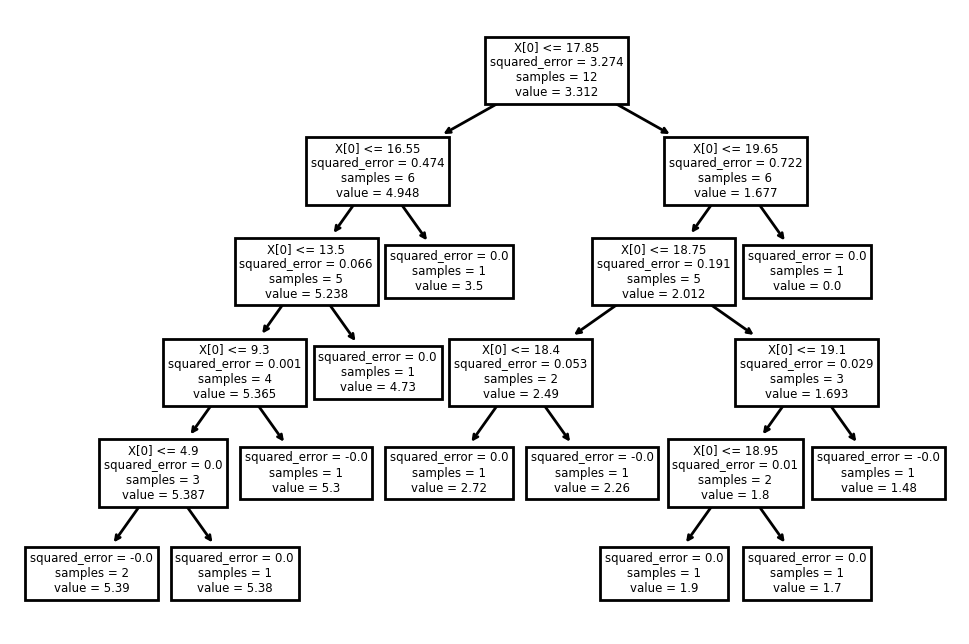

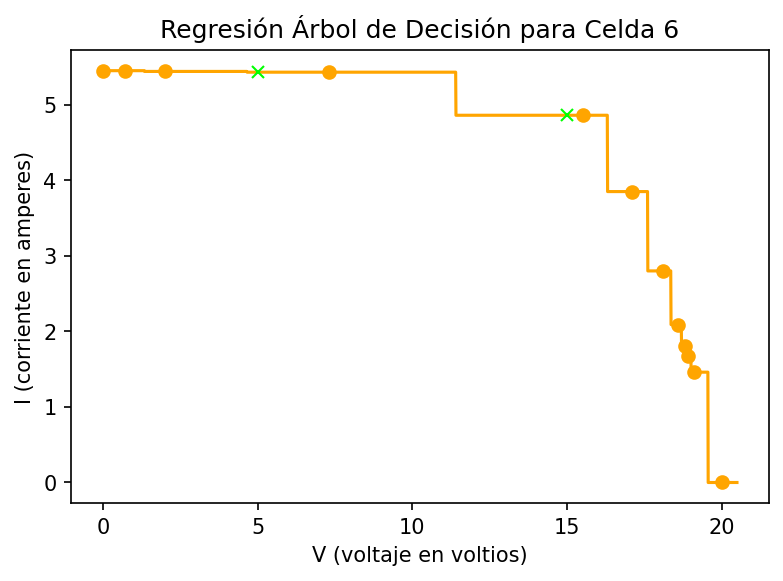







Precisión sobre valores REALES: 1.0
Precisión sobre valores PREDICCION: 1.0








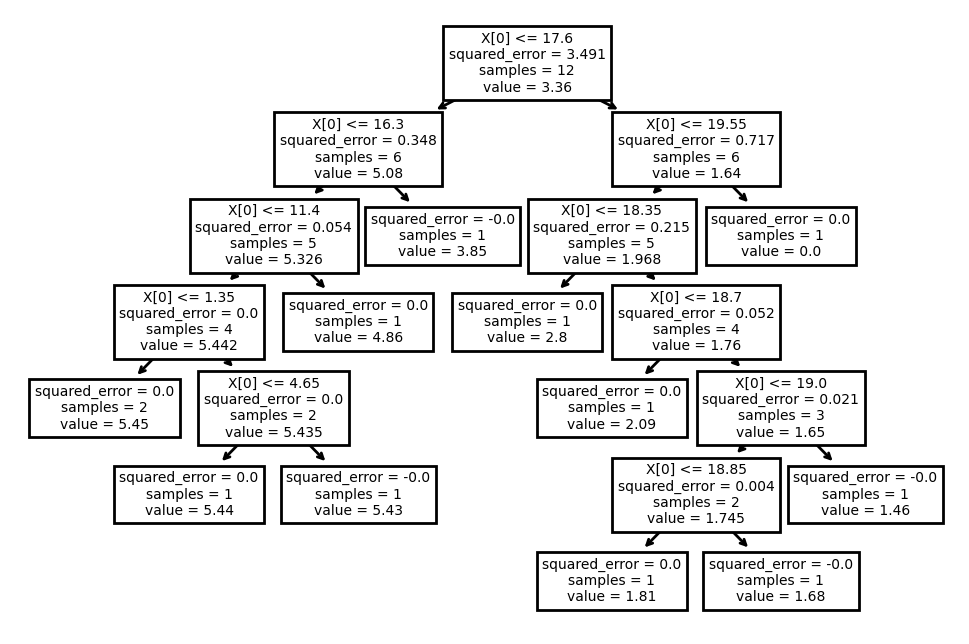

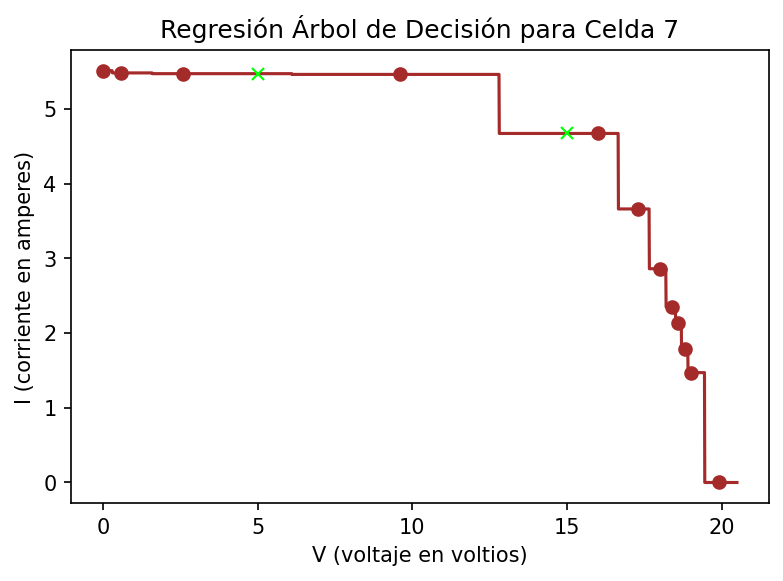







Precisión sobre valores REALES: 1.0
Precisión sobre valores PREDICCION: 1.0








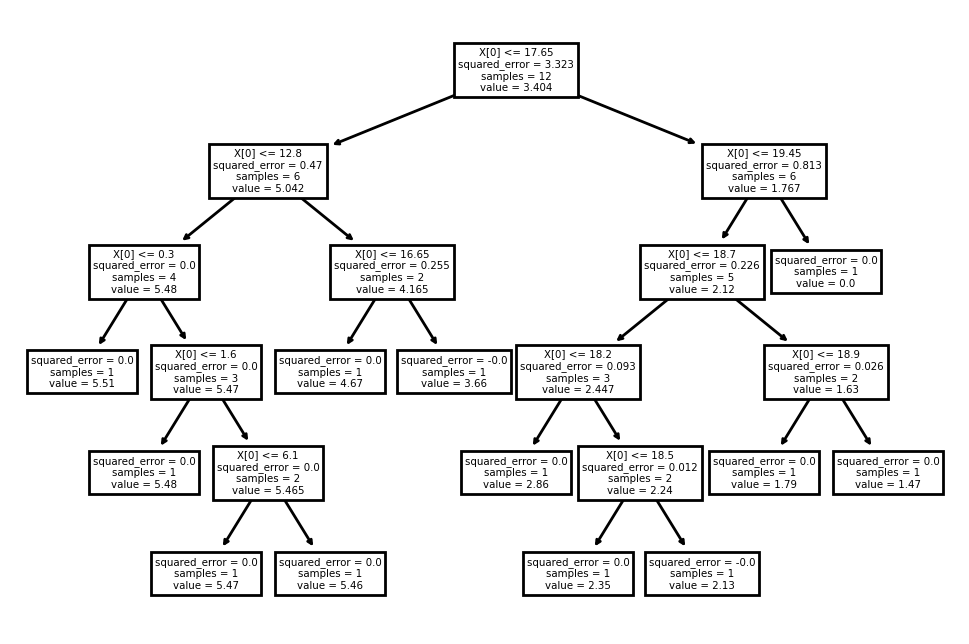

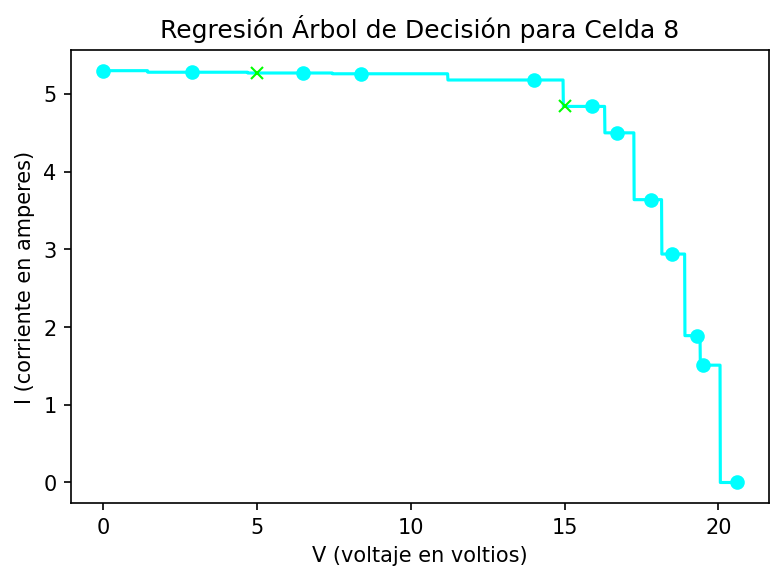







Precisión sobre valores REALES: 1.0
Precisión sobre valores PREDICCION: 1.0








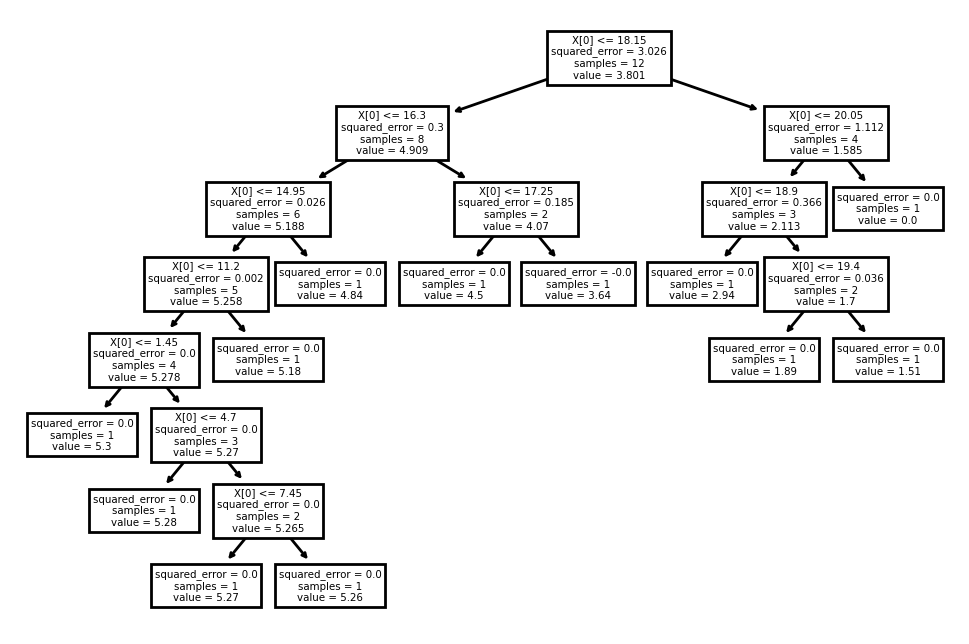

In [9]:
for i, color in enumerate(colores):
    regresion_arbol(data[f'Vcelda{i+1}'], data[f'Icelda{i+1}'], color, f'{i+1}')